In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.svm import SVC
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [123]:
df_movie = pd.read_csv("data_movies_v3.csv")
df_movie.head()

,index,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Science Fiction,Horror,Family,Fantasy,Mystery,Animation,History,Music,War,Documentary,Western,Foreign,TV Movie,num_of_production_companies,sentiment,subjective
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,4,0.041667,0.616667
1,1,300000000,Adventure Fantasy Action,285,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,-0.083333,0.266667
2,2,245000000,Action Adventure Crime,206647,en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,-0.306250,0.518750
3,3,250000000,Action Crime Drama Thriller,49026,en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,-0.044805,0.372078
4,4,260000000,Action Adventure Science Fiction,49529,en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.016667,0.566667


In [124]:
df_for_model = df_movie[(df_movie[['budget','popularity','revenue', 'runtime','vote_average', 'vote_count', 'sentiment','subjective']] != 0).all(axis=1)]
df_for_model = df_for_model.loc[:, ['budget','popularity','revenue', 'runtime','vote_average', 'vote_count','Drama','Comedy', 'Thriller', 'Action', 'Romance', 'Adventure', 'Crime','Science Fiction', 'Horror', 'Family', 'Fantasy', 'Mystery','Animation', 'History', 'Music', 'War', 'Documentary', 'Western','Foreign', 'num_of_production_companies', 'sentiment','subjective']]


In [125]:
df_for_model.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Science Fiction,Horror,Family,Fantasy,Mystery,Animation,History,Music,War,Documentary,Western,Foreign,num_of_production_companies,sentiment,subjective
0,237000000,150.437577,2787965087,162.0,7.2,11800,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,4,0.041667,0.616667
1,300000000,139.082615,961000000,169.0,6.9,4500,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,3,-0.083333,0.266667
2,245000000,107.376788,880674609,148.0,6.3,4466,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,3,-0.306250,0.518750
3,250000000,112.312950,1084939099,165.0,7.6,9106,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,-0.044805,0.372078
4,260000000,43.926995,284139100,132.0,6.1,2124,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.016667,0.566667


## Here we categorize popularity into three classes low, average and high represented by 0, 1 and 2

In [126]:
# Define the popularity categories
popularity_bins = [-1, 50, 100, float('inf')]
popularity_labels = [0, 1, 2]

# Convert the "popularity" column into categories
df_for_model['popularity'] = pd.cut(df_for_model['popularity'], bins=popularity_bins, labels=popularity_labels)

In [127]:
df_for_model.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Science Fiction,Horror,Family,Fantasy,Mystery,Animation,History,Music,War,Documentary,Western,Foreign,num_of_production_companies,sentiment,subjective
0,237000000,2,2787965087,162.0,7.2,11800,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,4,0.041667,0.616667
1,300000000,2,961000000,169.0,6.9,4500,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,3,-0.083333,0.266667
2,245000000,2,880674609,148.0,6.3,4466,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,3,-0.306250,0.518750
3,250000000,2,1084939099,165.0,7.6,9106,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,-0.044805,0.372078
4,260000000,0,284139100,132.0,6.1,2124,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.016667,0.566667


In [128]:
df_for_model['popularity'].value_counts()

0    2509
1     337
2      85
Name: popularity, dtype: int64

## Here we categorize movie into three classes hit, average and miss represented by 2, 1 and 0

In [129]:
# Define the conditions and assign values to "hit_average_miss"
df_for_model['hit_average_miss'] = 0  # Initialize with a default value
df_for_model.loc[df_for_model['revenue'] >= 2 * df_for_model['budget'], 'hit_average_miss'] = 2
df_for_model.loc[(df_for_model['budget'] <= df_for_model['revenue']) & (df_for_model['revenue'] < 2 * df_for_model['budget']), 'hit_average_miss'] = 1


## Sanity Check: Checking if our model works or not by adding output variable to input features

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


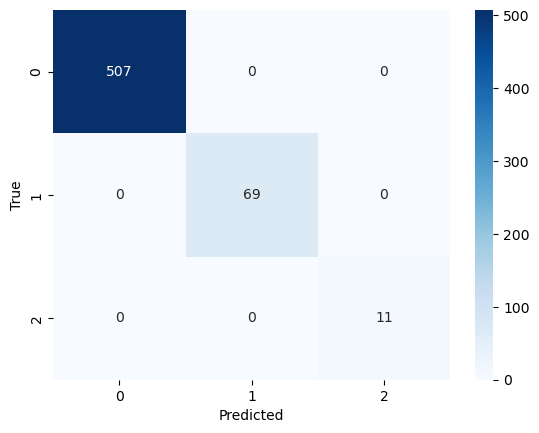

In [130]:
#Sanity Check
X= df_for_model
y = df_for_model['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scale input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Sanity Check: By Running our code on all the features(including the output feature), we got 100% accuracy, which means that our preprocessing is fine and model is working.

In [131]:
X = df_for_model.drop(['popularity','revenue'], axis=1)
y = df_for_model['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
X.head()

,budget,runtime,vote_average,vote_count,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Science Fiction,Horror,Family,Fantasy,Mystery,Animation,History,Music,War,Documentary,Western,Foreign,num_of_production_companies,sentiment,subjective,hit_average_miss
0,237000000,162.0,7.2,11800,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,4,0.041667,0.616667,2
1,300000000,169.0,6.9,4500,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,3,-0.083333,0.266667,2
2,245000000,148.0,6.3,4466,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,3,-0.306250,0.518750,2
3,250000000,165.0,7.6,9106,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,-0.044805,0.372078,2
4,260000000,132.0,6.1,2124,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.016667,0.566667,1


## Model 1: Logistic Regression

Accuracy: 0.9080068143100511
Precision: 0.90372669443329
Recall: 0.9080068143100511
F1 Score: 0.9055477951839763


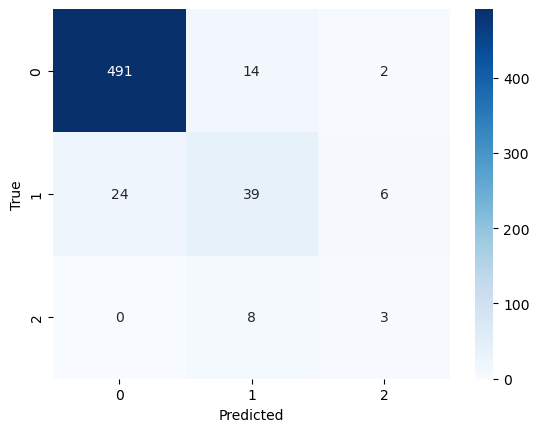

In [133]:
# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Hyperparameter Tuning on Logistic Regression

In [134]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

model = LogisticRegression()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_

/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.909710391822828
Precision: 0.9043157729974846
Recall: 0.909710391822828
F1 Score: 0.9066685032283758


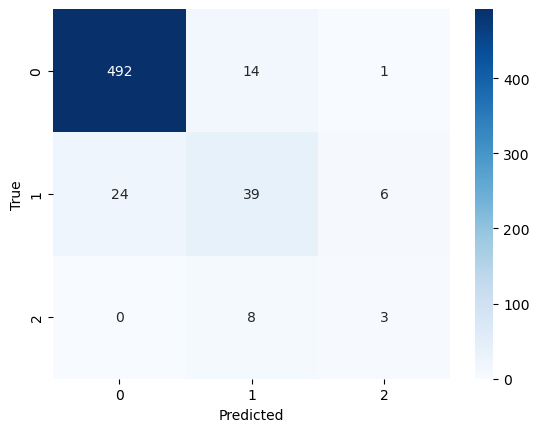

In [135]:
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Feature Selection: RFE(Recursive Feature Elimination)

Accuracy: 0.9080068143100511
Precision: 0.9015729301410587
Recall: 0.9080068143100511
F1 Score: 0.9042608197452746


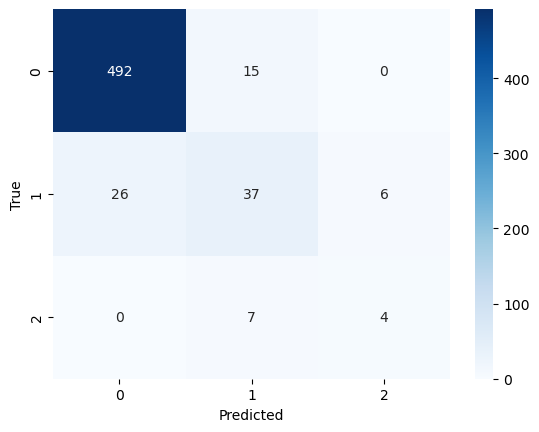

In [136]:
###
num_features_to_select = 5
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

# Fit the RFE model on the training data
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Train a model using the selected features
model.fit(X_train_rfe, y_train)

# Use the trained model to make predictions on the test set
X_test_rfe = rfe.transform(X_test)
y_pred = model.predict(X_test_rfe)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Model 2: XGBoost

Accuracy: 0.8926746166950597
Precision: 0.8954163748228698
Recall: 0.8926746166950597
F1 Score: 0.8939800830384165


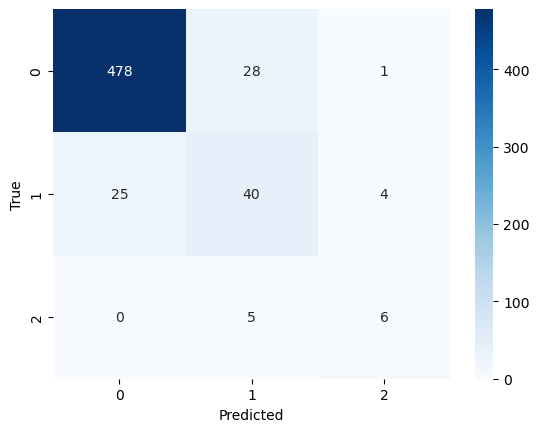

In [137]:
# Create and train the XGBoost classifier
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Hyperparameter Tuning on XGBoost

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.9080068143100511
Precision: 0.9023521324606234
Recall: 0.9080068143100511
F1 Score: 0.904384206834352


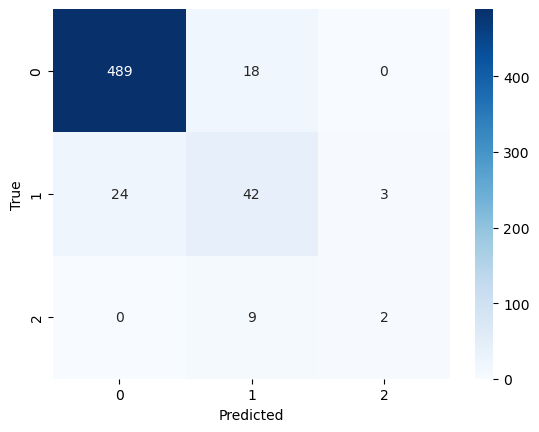

In [138]:
# Define the XGBoost classifier
model = XGBClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

y_pred = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Here we categorize movie into three classes hit, average and miss represented by 2, 1 and 0

In [139]:
# X = df_for_model.drop(['popularity','revenue','hit_average_miss'], axis=1)
X = df_for_model.drop(['revenue','hit_average_miss'], axis=1)
y = df_for_model['hit_average_miss']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scale input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [140]:
df_for_model['hit_average_miss'].value_counts()

2    1662
0     700
1     569
Name: hit_average_miss, dtype: int64

## Logistic Regression to Predict Hit/Miss/average

Accuracy: 0.6303236797274276
Precision: 0.6014402506310779
Recall: 0.6303236797274276
F1 Score: 0.5816649530028842


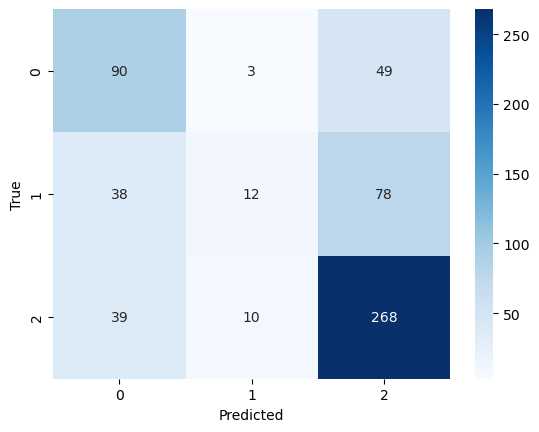

In [141]:
# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Hyperparameter tuning on Logistic Regression

In [142]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

model = LogisticRegression()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_

/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.6354344122657581
Precision: 0.6118883663061421
Recall: 0.6354344122657581
F1 Score: 0.5827043302555526


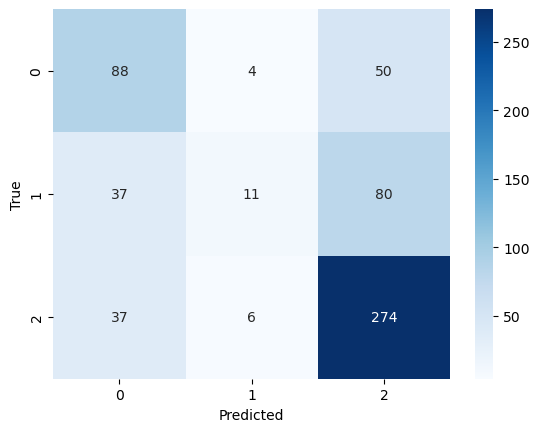

In [143]:
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## XGBoost Classification to Predict Hit/Miss/average

Accuracy: 0.606473594548552
Precision: 0.5763653007088977
Recall: 0.606473594548552
F1 Score: 0.5850402525033332


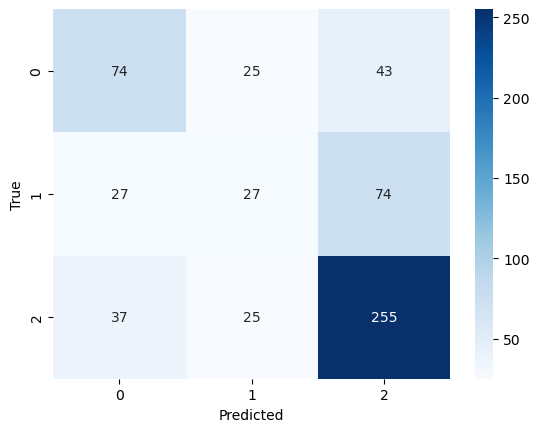

In [144]:
# Create and train the XGBoost classifier
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Hyperparameter Tuning on XGBoost

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.6422487223168655
Precision: 0.5941869937945473
Recall: 0.6422487223168655
F1 Score: 0.5995386692144


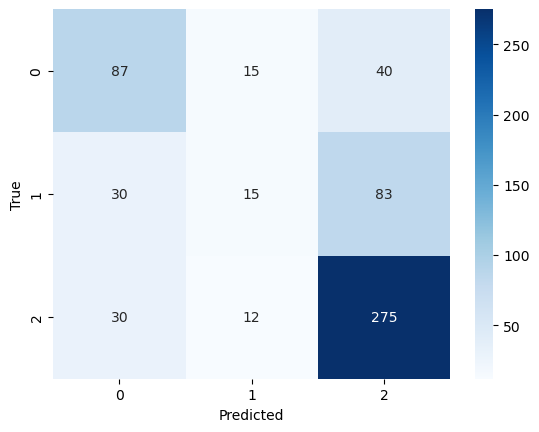

In [145]:
# Define the XGBoost classifier
model = XGBClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

y_pred = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Model 3: K-Means Clustering

# Euclidean Distance calculated on original data with over 25 dimensions; Later the data and centroids are reduced using PCA to 2 dimensions for visualization

In [146]:
X = df_for_model.drop(['revenue','popularity','vote_average'], axis=1)
kmeans_cluster = KMeans(init = "random",n_clusters = 3,n_init = 50,random_state = 0) 
kmeans_cluster.fit(X)
centroids = kmeans_cluster.cluster_centers_

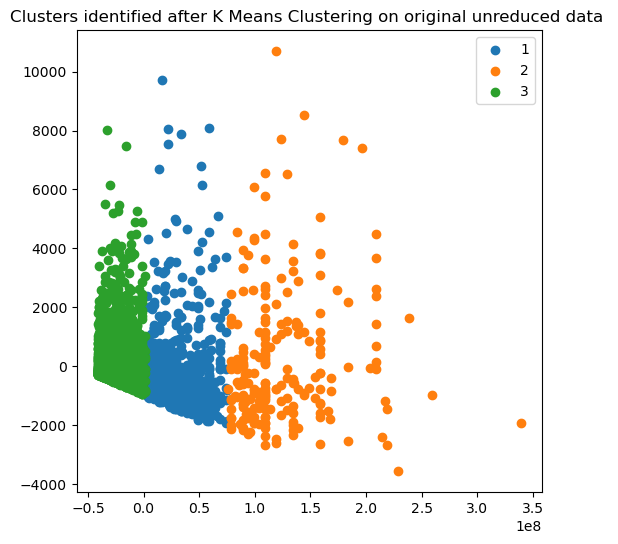

In [147]:
pca = PCA(2)
reduced_X = pca.fit_transform(X)
kmc_predictions = kmeans_cluster.fit_predict(X)

reduced_centroids = pca.fit_transform(centroids)


plt.figure(figsize=(6, 6))
plt.title("Clusters identified after K Means Clustering on original unreduced data ") #, and their Centroids
for i in range(3):
    plt.scatter(reduced_X[kmc_predictions == i, 0],
                reduced_X[kmc_predictions == i, 1],
                label=i+1)
# plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='k', zorder=10)

plt.legend()
plt.show()

## WCSS calculation and elbow identification to find optimum k

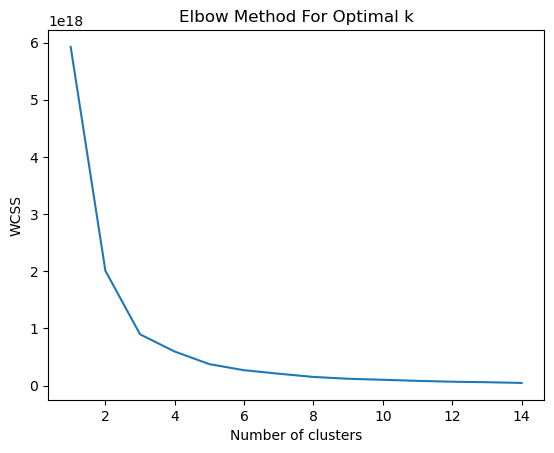

In [148]:
wcss = []
for i in range(1, 15):
    kmeans_cluster = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_cluster.fit(X)
    wcss.append(kmeans_cluster.inertia_)
plt.figure()
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_method.png')
plt.show()

In [153]:
df_for_model['popularity'].value_counts()

0    2509
1     337
2      85
Name: popularity, dtype: int64